# Regression in Python

***
Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. 

Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. 

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### Mathematical Recap

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_1 X + \beta_0 +  \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. 

1. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. 

1. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect on $Y$ with a one-unit increase in $X$ .

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

For a random variable y, the unconditional mean is simply the expected value, E(y). In contrast, the conditional mean is the expected value of E(y| X = x) given a conditioning set of variables, Ωt.

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods

### Estimating $\hat\beta$: Least squares

[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

Since we have to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

In order for this solution to exist, $X^T X$ should be invertible. 

This requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. <br>
Basically, $X^T X$ is full rank if all rows and columns are linearly independent. 

**This is important because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.**

***
# Part 2: Data Preprocessing

This mini project deals with analyzing the [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) that contains information about the housing values in suburbs of Boston.  

In [1]:
# Setting matplotlib inline 
%matplotlib inline 

# Performing necessary imports 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from matplotlib.pyplot import figure
import scipy.stats as stats

In [2]:
# Setting default styles for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
# Loading 'boston' dataset from sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
# Columns
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
# Converting into dataframe
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The dataset does not have column names appended to it but they are seperately stored in 'feature_names'. We can append the columns using 'columns' attribute.

In [8]:
# Appendeing the column names to 'bos' dataframe
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The dataframe does not contain the response variable in itself. It is stored in 'target' data. 

In [9]:
# Verifying if the target variable also has the same shape
print(boston.target.shape)

(506,)


In [10]:
# Appending the 'dependent' variable to the 'bos' dataframe.
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


***
# Part 3: EDA and Summary Statistics

### Summary Statistics
***

In [11]:
# Verifying if the data contains any null values
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


There are no missing values in the data.

In [12]:
# Basic summary statistics
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


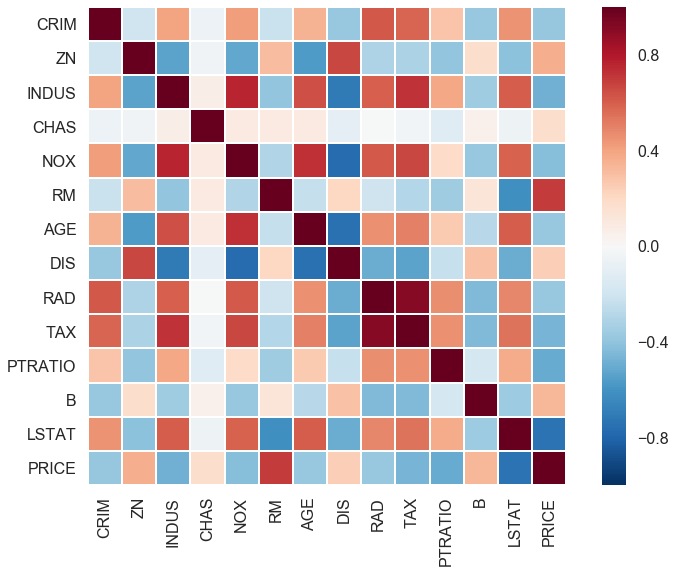

In [13]:
# Correlation matrix between multiple variables
corr = bos.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), square=True, linewidths=1)

We see that 'RM' i.e. number of rooms and 'ZN' i.e. proportion of residential land zone are positively correlated to 'PRICE' compared to rest of the variables.

We also see a weak positive relationship between the variables 'B', 'DIS' and 'ZN' with the target variable 'PRICE'

### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

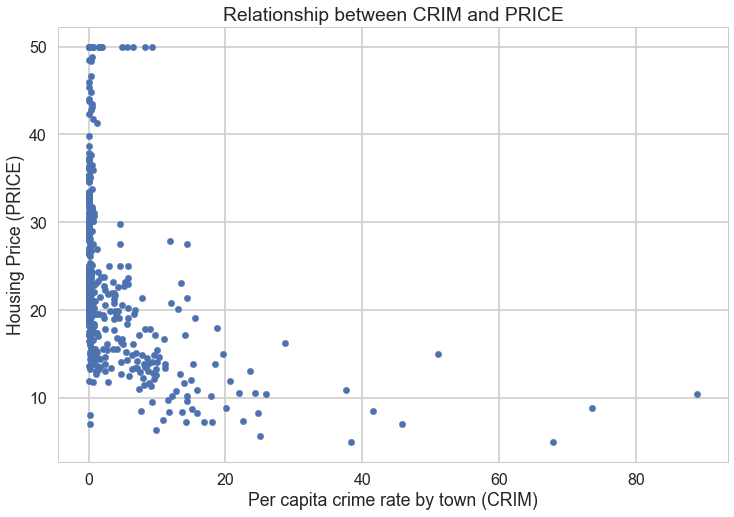

In [14]:
# Scatter plot between CRIM and Price
figure(figsize=(12,8))
plt.scatter(bos.CRIM, bos.PRICE, s = 40)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price (PRICE)")
plt.title("Relationship between CRIM and PRICE")

**Graphical Interepretations**
1. It follows a <u> non-linear negative </u> relationship. 
1. There is ceiling at 50 for 'Housing Price' and another at 0 for 'Per capita crime rate'.This means that our data does not have prices beyond 50 units. 
1. High priced houses have CRIM rate less than 10.
1. The data is widely spread for prices below 20 units.


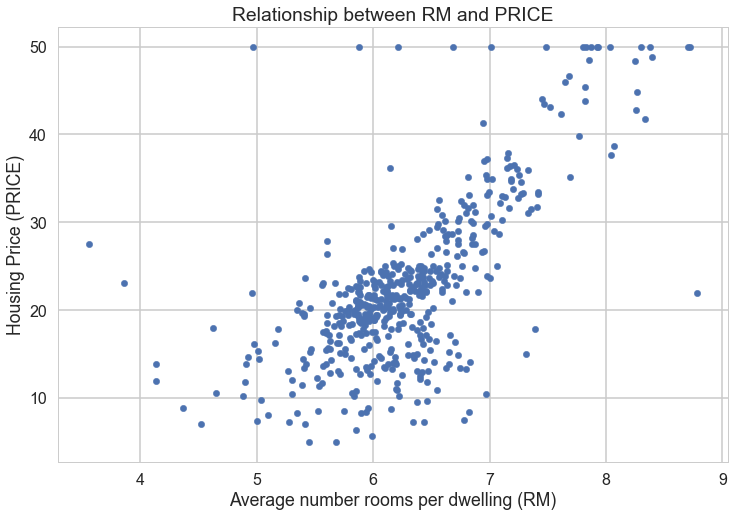

In [15]:
# Scatter plot between RM and PRICE
figure(figsize=(12,8))
plt.scatter(bos.RM, bos.PRICE, s = 40)
plt.xlabel("Average number rooms per dwelling (RM)")
plt.ylabel("Housing Price (PRICE)")
plt.title("Relationship between RM and PRICE")

**Graphical Interepretations**

1. We can notice a <u> strong positive relationship </u> between the number of rooms versus the house's price.
1. There are also some outlier for housing prices between 20 and 30 units.  (both positive and negative outliers)
1. Also, the data is widely spread for prices less than 20 units.

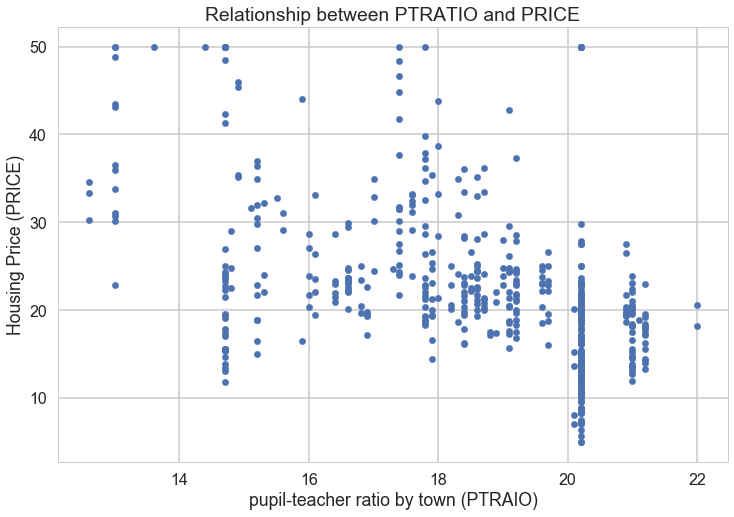

In [16]:
# Scatter plot between PTRATIO and PRICE
figure(figsize=(12,8))
plt.scatter(bos.PTRATIO, bos.PRICE, s = 40)
plt.xlabel("pupil-teacher ratio by town (PTRAIO)")
plt.ylabel("Housing Price (PRICE)")
plt.title("Relationship between PTRATIO and PRICE")

** Graphical Interepretations **
1. It looks like the data follows a weak negative linear relationship between 'PTRATIO' and 'PRICE'. 
1. A more robust interpretation can be made on 'outliers' if we have more data. 
1. However, we can notice that schools with students from wealthy households tend to have less 'teacher to pupil' ratio compared to their counterparts.

From the correlation matrix, we noticed that there was a positive relationship between 'B' (proportion of blacks) and 'PRICE'

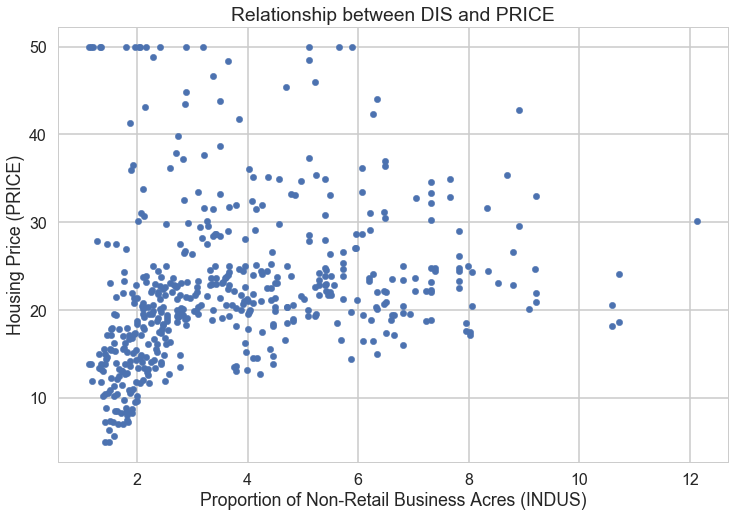

In [17]:
# Some other scatter plots - INDUS vs PRICE
figure(figsize=(12,8))
plt.scatter(bos.DIS, bos.PRICE, s = 40)
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Housing Price (PRICE)")
plt.title("Relationship between DIS and PRICE")

** Graphical Interpretations **

1. From the corelation matrix it was evident that there was positive correlation between 'DIS' and 'PRICE'. Looking at the data reveals that there is indeed a strong positive relationship for 'DIS' less than 4 units. 

2. However, a significant number of observations are widely spread for the same values. Overall, there is a slightly strong positive relationship for distance from Boston Employment Center.

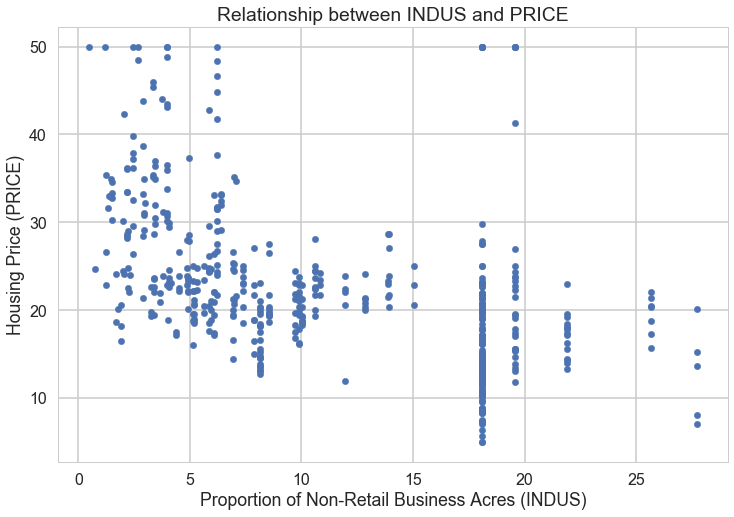

In [18]:
# Some other scatter plots - INDUS vs PRICE
figure(figsize=(12,8))
plt.scatter(bos.INDUS, bos.PRICE, s = 40)
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Housing Price (PRICE)")
plt.title("Relationship between INDUS and PRICE")

**Graphical Interpretation**

1. A moderately negative linear relationship exists between INDUS and Price variable.
1. Housing prices tend be lower as the proportion of non-retail business increases.

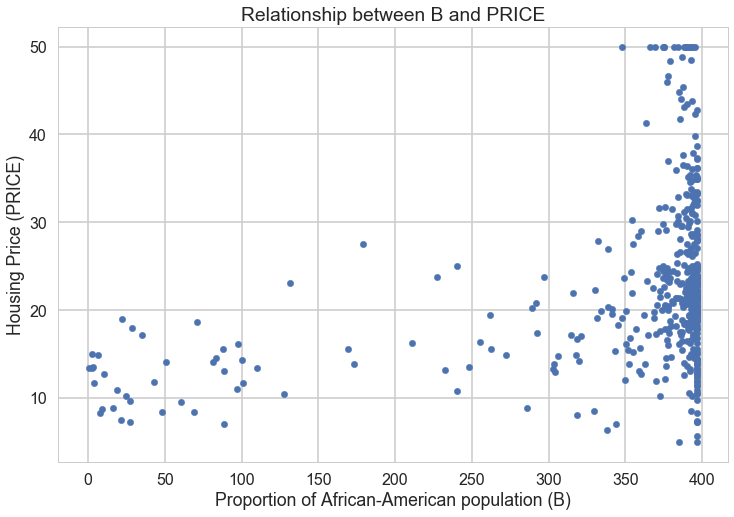

In [19]:
# Some other scatter plots - B vs PRICE
figure(figsize=(12,8))
plt.scatter(bos.B, bos.PRICE, s = 40)
plt.xlabel("Proportion of African-American population (B)")
plt.ylabel("Housing Price (PRICE)")
plt.title("Relationship between B and PRICE")

**Graphical Interepreations**

1. A clear relationship is not evident looking at the scatter plot.
1. However, we do notice two clusters in the plot, one below 150 units and another above 300 units. The former is least scattered while the latter is densly.

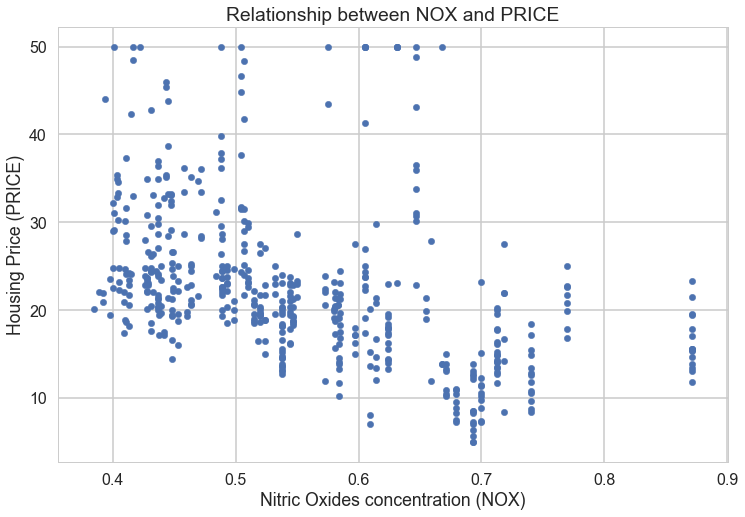

In [20]:
# Some other scatter plots - NOX vs PRICE
figure(figsize=(12,8))
plt.scatter(bos.NOX, bos.PRICE, s = 40)
plt.xlabel("Nitric Oxides concentration (NOX)")
plt.ylabel("Housing Price (PRICE)")
plt.title("Relationship between NOX and PRICE")

**Graphical Interpretations**

1. Looking at the plot it seems that there is a negative linear relationship.
1. However, few observations (on the extreme right of the graph), follow a non-linear relationship.

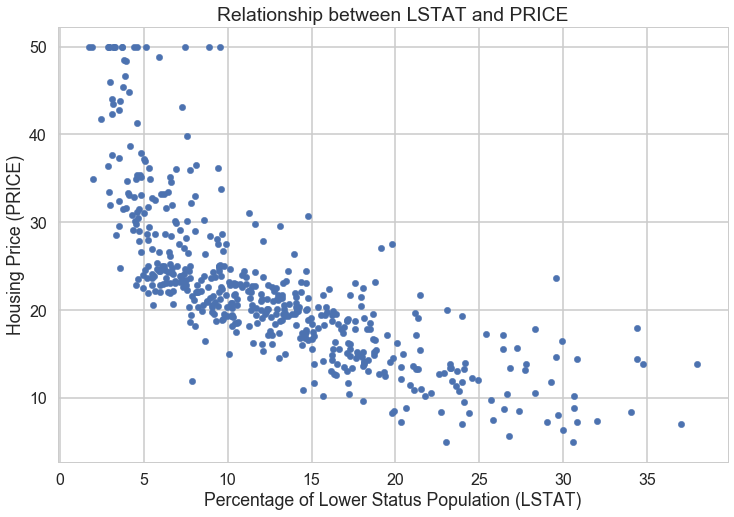

In [21]:
# Some other scatter plots - LSTAT vs PRICE
figure(figsize=(12,8))
plt.scatter(bos.LSTAT, bos.PRICE, s = 40)
plt.xlabel("Percentage of Lower Status Population (LSTAT)")
plt.ylabel("Housing Price (PRICE)")
plt.title("Relationship between LSTAT and PRICE")

**Graphical Interpretations**
1. We see a strong negative linear relation between LSTAT and PRICE.
1. There is a ceiling at 50 units of 'PRICE' for few observations with LSTAT values below 10%

### Regplots
***
Regplots are scatter plots with linear regression fits

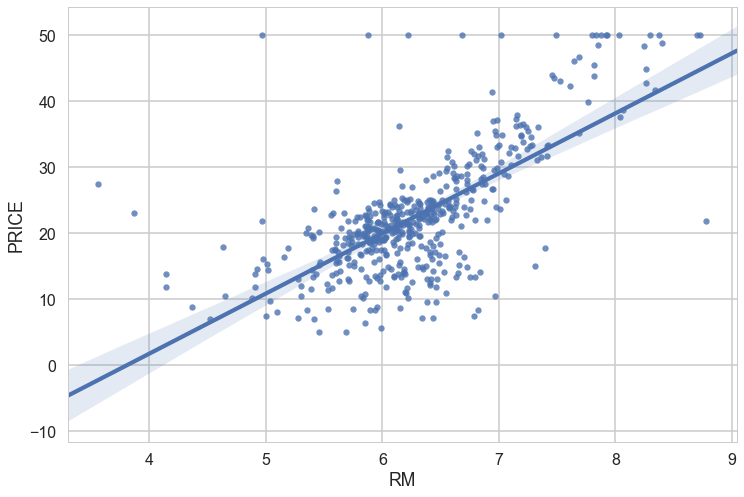

In [22]:
# Regression plot between RM and PRICE
figure(figsize=(12,8))
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True, scatter_kws={'s':40})

### Histograms
***


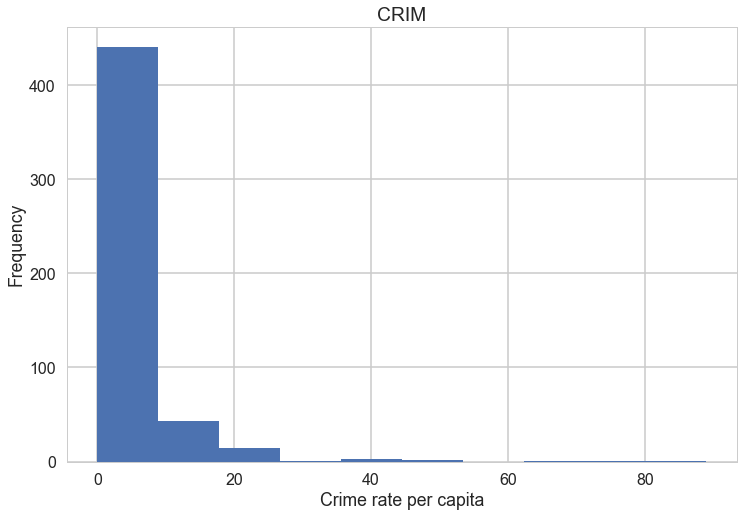

In [23]:
# Histogram for 'CRIM'
figure(figsize=(12,8))
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

We see that the data is skewed to the right and is concentrated in one single bin. To understand the underlying distribution, we can use transformations on the data, such as 'logarithmic' transformations. 

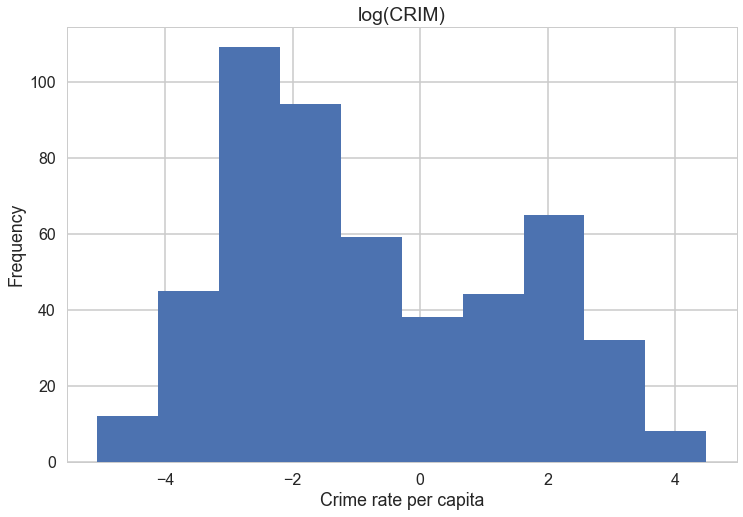

In [24]:
# Histogram with logarithmic transformations on 'CRIM'
figure(figsize=(12,8))
plt.hist(np.log(bos.CRIM))
plt.title("log(CRIM)")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

**Graphical Interepretation**
1. Looking at the histogram of transformed data, we see that the transformations have reduced the skewness.
1. With a model distribution, the data is spread between 5 and 8.

In [25]:
a1 = bos['RM']
a2 = bos['PTRATIO']

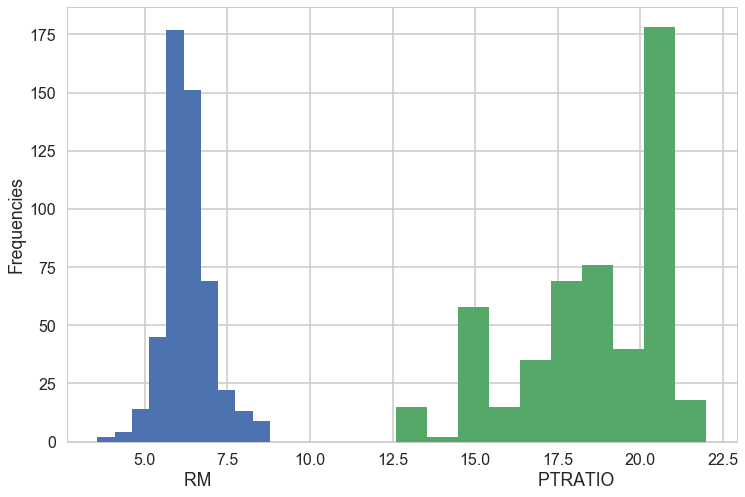

In [26]:
figure(figsize=(12,8))
plt.hist(bos['RM'], label ='RM')
plt.hist(bos['PTRATIO'], label ='PTRATIO')
plt.ylabel('Frequencies')
plt.xlabel('RM                                                                   PTRATIO ')

# Part 3': Training and Test Data sets

#### Purpose of splitting data into Training/testing sets

1. The data we use to build the model cannot be used to test the same model. 
2. To solve that we have split the data into two sets [Train (80%) and Test (20%)] of the data.
3. This can be done by Scikit Learns 'train_test_split()'.

In [27]:
bos_train = bos.drop('PRICE', axis = 1)

In [28]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    bos_train, bos.PRICE, test_size=0.33, random_state = 5)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


#### Linear Regression on Training Data

In [29]:
from sklearn import linear_model
from sklearn import datasets

In [ ]:
regg = linear_model.LinearRegression()
reggfit = regg.fit(X_train, y_train)
y_pred_train = reggfit.predict(X_test)
y_pred_test = reggfit.predict(X_train)

In [30]:
print('Coeff: ', regg.coef_)

print('Variance score: %.2f' % regg.score(X_test, y_test))

# print('Mean Squared Error with Test Data: %.2f ', np.mean((y_pred_test - y_test) ** 2))

# print('Mean Squared Error with Train Data: %.2f ', np.mean((y_pred_train - y_train) ** 2))

Coeff:  [ -1.56381297e-01   3.85490972e-02  -2.50629921e-02   7.86439684e-01
  -1.29469121e+01   4.00268857e+00  -1.16023395e-02  -1.36828811e+00
   3.41756915e-01  -1.35148823e-02  -9.88866034e-01   1.20588215e-02
  -4.72644280e-01]
Variance score: 0.70


In [34]:
from sklearn.cross_validation import cross_val_score

In [88]:
# Now measure its performance with the test data with single subset
print ('Single subset performance: ' , regg.score(X_test, y_test)) 

# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_val_score(reggfit, bos_train.values, bos.PRICE.values, cv = 4)

# Print the accuracy for each fold:
print ('Accuracies of 4 folds: ' , scores)

# And the mean accuracy of all 4 folds:
print ('Mean accuracy of 4 folds: ' , scores.mean())

Single subset performance:  0.78182269552
Accuracies of 4 folds:  [ 0.60157044  0.60368748  0.35870794 -1.12403993]
Mean accuracy of 4 folds:  0.109981484056


#### Residual Plots

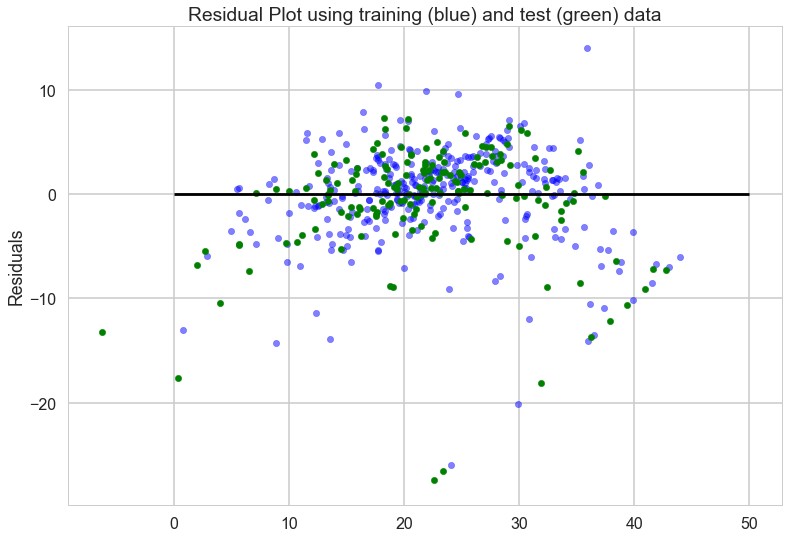

In [38]:
plt.scatter(regg.predict(X_train), regg.predict(X_train) - y_train, c = 'b', s=40, alpha=0.5)
plt.scatter(regg.predict(X_test), regg.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

#### K-fold Cross-validation as an extension of this idea

A simple extension of the Test/train split is called K-fold cross-validation.

Here's the procedure:

1. randomly assign your $n$ samples to one of $K$ groups. They'll each have about $n/k$ samples
2. For each group $k$:
    1. Fit the model (e.g. run regression) on all data excluding the $k^{th}$ group
    <li> Use the model to predict the outcomes in group $k$
    <li> Calculate your prediction error for each observation in $k^{th}$ group (e.g. $(Y_i - \hat{Y}_i)^2$ for regression, $\mathbb{1}(Y_i = \hat{Y}_i)$ for logistic regression).
3. Calculate the average prediction error across all samples $Err_{CV} = \frac{1}{n}\sum_{i=1}^n (Y_i - \hat{Y}_i)^2$

Luckily you don't have to do this entire process all by hand (for loops, etc.) every single time, sci-kit learn has a very nice implementation of this, have a look at the documentation.

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
kf = KFold(n_splits = 4, random_state = 5, shuffle = True)
mse = []
for train_index, test_index in kf.split(bos_train):
    X_train, X_test = bos_train.iloc[train_index], bos_train.iloc[test_index]
    y_train, y_test = bos.PRICE[train_index], bos.PRICE[test_index]
    lm.fit(X_train, y_train)
    mse.append(np.mean((y_test - lm.predict(X_test))**2))
print ('The prediction errors for K=4 groups: {}'.format(mse))
print ('Average prediction error: {}'.format(np.mean(mse)))

The prediction errors for K=4 groups: [24.29810576843915, 25.197562364257458, 23.38850417830502, 23.89667161102933]
Average prediction error: 24.195210980507742



Summary: The K-Fold cross-validation yields an average prediction error that is smaller than the simple train-test split used previously. Multiple rounds of cross-validation performed on different partitions help limit the problem of overfitting a particular training subset and thus reduce variability of the model.

***
## Part 4: Linear Regression with Boston Housing Data Example

We can fit the model in two ways:

1. Statsmodels
1. Sklearn

### 1(a) - Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions. 

The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. 

There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

####  `statsmodels` formulas

This formula notation in `statsmodels` will seem familiar to `R` users.

The structure is very simple:
`Outcome ~ X1`

To handle more complex models, multiple regression can be built like this:
`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is
`Y ~ X1 + X2 + ... + Xp`

For `statsmodels` calls, you need to have a Pandas dataframe with column names. 

**Note**:
1. You can force statsmodels to treat variables as categorical with the `C()` function <br>
1. Call numpy functions to transform data such as `np.log` for extremely-skewed data <br> 
1. Fit a model without an intercept by including `- 1` in the formula. 

In [42]:
# Import regression modules
from pandas.core import datetools
import pandas.tseries
import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\Nishu\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


'statsmodels' works nicely with pandas dataframes. We write the dependant variable and independant variable seperated by tilde (~) to ols()

In [43]:
# statsmodels works nicely with pandas dataframes. 
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           2.49e-74
Time:                        22:40:57   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). 

The intercept is (-34.6706) which denotes that if the value of 'RM' is 0, then the target variable is -34.67 units.

The regression coefficient for `RM` is 9.1021. This means that *on average, each additional room is associated with an increase of $\$9,100$ in house price *. 

p-value (`P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statistically significant predictor of `PRICE`. 

The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$). 
___
In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

#### Scatter plot between Original Prices and Predicted Prices

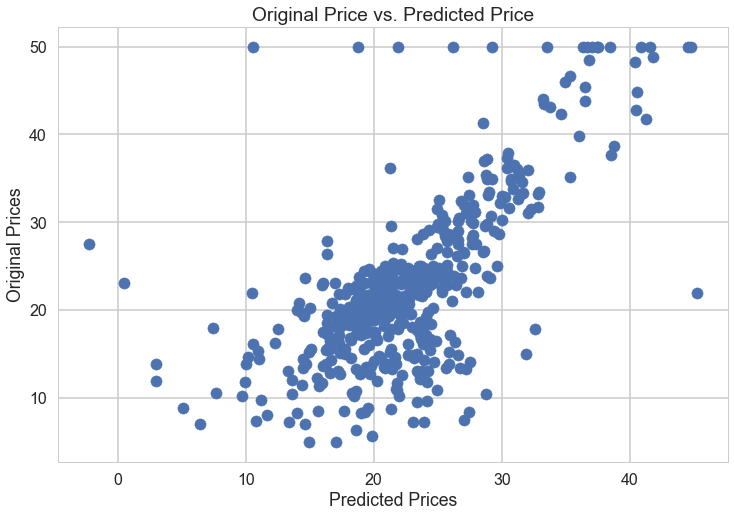

In [45]:
# Scatter plot between Original Prices and Predicted Prices
figure(figsize=(12,8))
plt.scatter(m.fittedvalues,bos.PRICE)
plt.title('Original Price vs. Predicted Price')
plt.xlabel('Predicted Prices')
plt.ylabel('Original Prices')

**Graphical Interpretations**
1. There is a strong positive relationship is evident from the plot. Also note, there is a ceiling at 50 for the price.
1. Notice that there is a negative observation (predicted) while its original price is a little below 30 units.
1. If we closely look at the observations inside the squares of the plot, we see that the original prices are actually higher than the predicted prices (i.e. mostly, the data points are concentrated on the bottom left side of the square).   

### 1(b) - Fitting Linear Regression using `sklearn`


In [46]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

In [47]:
# Instantiate LinearRegression
lm = LinearRegression()

 This creates a LinearRegression object

#### What can you do with a LinearRegression object? 
***
Below are the functions that can be called on 'LinearRegression' object

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

#### What output can you get?

Using the function, it produces the following outputs.

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### 2. Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [48]:
# Using all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Notes**

1. Including an intercept in your model depends largely on the problem you at hand. Excluding an intercept helps extensively in 'Gauss-Markov' process. However, it would also affect the models fit negatively.  
http://www.aaronschlegel.com/linear-regression-through-the-origin/

1. To use linear regression, only the residuals must be normally distributed. There is no narmality assumption for the target variable.

1. One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). Even though if the residuals are normally distributed, that itself is not enough. Reason being, normally distributed residuals have the same mean and standard deviation but it doesn't account if the variables are 'interrelated' or 'confounding'. Hence they cannot be independently and identically distributed.

### 3. Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$

In [49]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.491103280363404


In [50]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [51]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Predicted Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [52]:
# First five predicted prices
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

#### Histogram of Predicted Prices

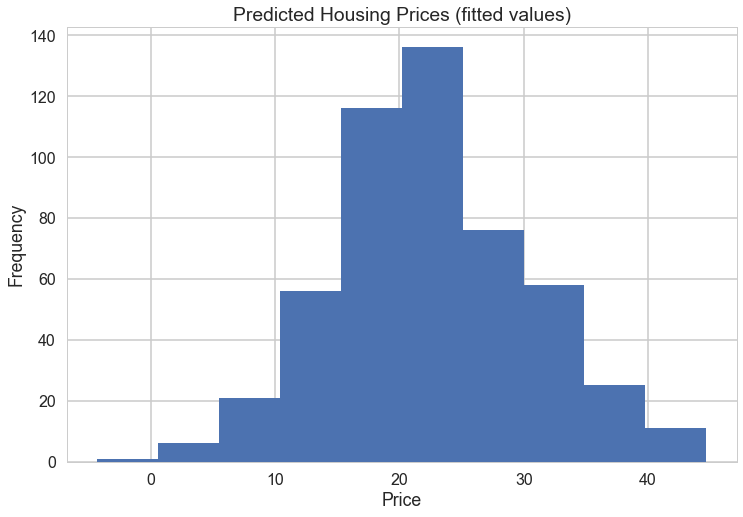

In [53]:
# Histogram for all predicted prices
figure(figsize=(12,8))
plt.hist(lm.predict(X))
plt.title("Predicted Housing Prices (fitted values)")
plt.xlabel("Price")
plt.ylabel("Frequency")

In [54]:
from scipy.stats import stats
stats.describe(pd.DataFrame((lm.predict(X))))

DescribeResult(nobs=506, minmax=(array([-4.28300934]), array([ 44.67339923])), mean=array([ 22.53280632]), variance=array([ 62.64558244]), skewness=array([ 0.11077348]), kurtosis=array([ 0.10314181]))

** Graphical Interepretation **
1. The data is normally distributed with mean of 22.5. 
1. It also appears that there are very few outliers on the left tail (which need no special adjustments) and data is slightly skewed positively (~0.11).
1. There are fewer homes with lower predicted prices (i.e. there is more data to the right of the center than the left of center so it skewed to the right). The most frequent predicted price falls between 20,000 and 25,000 dollars with the second most frequent price falling between 15,000 and 20,000 dollars. There are more homes with predicted prices above 25,0000 than there are homes with predicted prices below 15,000 dollars.
1. The values of predicted price that are less than 0 can be considered outliers. This could represent that the model is not accurate for values close to zero.

#### Scatter Plot between Actual Prices and Predicted Prices

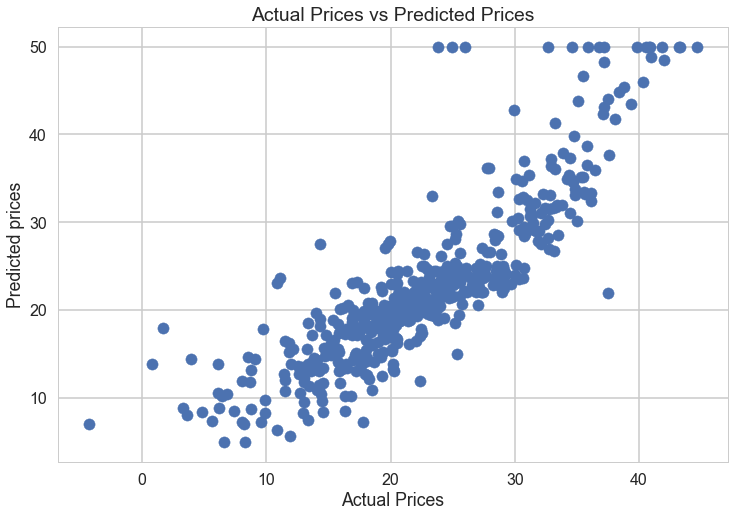

In [55]:
figure(figsize=(12,8))
plt.scatter(lm.predict(X), bos.PRICE)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")

** Graphical Interpretation**

1. There is a strong positive <u> association</u> between the actual prices and the predicted ones. 
1. A ceiling effect is apparent st 50 units.

Advantages of Statsmodel:
    1. Works well with Pandas dataframes
    2. Detailed statistical output
    3. R-style function syntax.

Advantages of Scikit-learn:
    1. Simpler implementation
    2. Variety of options
    3. Pipelines make data transformations easier (standardization etc.)


## Part 5 - Evaluating the Model

### Sum-of-Squares:

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

### The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$

$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

In [56]:
# Residual Sum of Squares
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11080.276284149868


In [57]:
# Explained Sum of Squares
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

8.69056631064e-23


## Part 6 - Fitting Other Models (using different variables)

#### Linear Regression between 'PTRATIO' and 'PRICE'

In [58]:
import scipy.stats as stats

In [59]:
# Function to perform linear regression on single variables
def single_regression(X, Y):
    """Rgeression for single variables"""
    lm.fit(X.values.reshape(-1,1), Y)
    lm.predict(X.values.reshape(-1,1))

    # Computes r square
    r2 = lm.score(X.values.reshape(-1,1), Y)
    print("r-squared value:",r2)
    
    # Computes f-statistical value
    f_stat = (r2)/(1-r2)
    print("f-statistic:",f_stat)
    
    # Computes p-value
    p_val = stats.f.cdf(f_stat, len(X)-1, len(Y)-1)
    print("p-value:",p_val)
    
    return r2

In [60]:
# Function to perform linear regression on multiple variables
def multi_regression(X,Y):
    """Regression with multiple variables"""
    lm.fit(X, Y)
    lm.predict(X)
    
    # Computes r square
    r2 = lm.score(X, Y)
    print("r-squared value:",r2)
    
    # Computes f-statistical value
    f_stat = (r2)/(1-r2)
    print("f-statistic:",f_stat)
    
    # Computes p-value
    p_val = stats.f.cdf(f_stat, len(X)-1, len(Y)-1)
    print("p-value:",p_val)
    
    return r2

In [61]:
single_regression(bos.PTRATIO, bos.PRICE)

r-squared value: 0.257847318009
f-statistic: 0.34743163269
p-value: 1.77801531798e-31


0.257847318009223

In [62]:
# Linear Regression using `Statsmodel`
m = ols('PRICE ~ PTRATIO',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           1.61e-34
Time:                        22:42:22   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

** Interpretation of the Output**
1. R squared (the coefficient of determination) represents how strong the relationship between two variables (indenpendant and denpendant response variable). [If the R^2 value is high then the model is a good fit to the data.]
1. F Statistic determines whether the model we just fit is statistically significant or not. [If the F-statistic is high then the regression coefficients have low validity in fitting the data.]
1. The t-statistic is -13.233. If you square that, you get 175.1. The F-statistic is t_statistic squared for a simple linear regression.

**Note**: The F-statistic can be used to determine the probability that any change in outcome was due to random chance or due to the influence of a variable or group of variables. If the F statistic is greater than F-critical, then we can reject the null hypothesis that it was due to randomness and conclude that the change in outcome was affected by the variables. In this case, looking at the F-table, we see that for 1 degree of freedom in both the numerator and denominator, F critical is 161.446. Since F is greater than that, we can reject the null hypothesis and conclude that PTRATIO does affect PRICE.

Taking a close look at the F-statistic and t-statistic for the regression coefficient, the relationship I notice is
that F-statistic is the t-statistic to the second power.

### Linear Regression with other independent variables ('CRIM', 'RM', 'PTRATIO')

#### Linear Regression between 'CRIM' and 'PRICE'

In [63]:
single_regression(bos.CRIM,bos.PRICE)

r-squared value: 0.148866092919
f-statistic: 0.174903257502
p-value: 7.53743031105e-77


0.14886609291873587

#### Linear Regression between 'RM' and 'PRICE'

In [64]:
single_regression(bos.RM,bos.PRICE)

r-squared value: 0.483525455991
f-statistic: 0.936203848961
p-value: 0.229567115257


0.48352545599133429

#### Linear Regression between 'PTRATIO' and 'PRICE'

In [65]:
single_regression(bos.PTRATIO,bos.PRICE)

r-squared value: 0.257847318009
f-statistic: 0.34743163269
p-value: 1.77801531798e-31


0.257847318009223

In [66]:
multi_regression(bos[['PTRATIO','CRIM', 'RM']],bos.PRICE)

r-squared value: 0.593414155114
f-statistic: 1.45950520063
p-value: 0.99998850611


0.59341415511369788

In [67]:
# Combined regression with three variables ('CRIM', 'RM' and 'PTRATIO')
o = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(o.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           1.09e-97
Time:                        22:42:40   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

**R-Square:**
R squared provides a measure of strength of relationship between our predictors and our response variable. If the R^2 value is high then the model is a good fit to the data. The R-squared number tells us taht 59.3% of the data fit on the model. 

**F-statistic:**
F Statistic gives us a power to judge whether R² is significant or not. F-statistic tells us that these three variables as a group or at least one of the variables have an impact on the outcome PRICE that is statistically significant.

## Part 7: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

### Create a new model with addition variable:

Variable of interest - 'CHAS'

In [54]:
import math

In [68]:
multi_regression(bos[['PTRATIO','CRIM','CHAS','RM']],bos.PRICE)

# r1 = multi_regression(bos[['PTRATIO','CRIM', 'CHAS', RM']],bos.PRICE)
# aic1 = 2*(1)-2*math.log(r1)
# print("AIC:", aic1)

r-squared value: 0.600364286331
f-statistic: 1.50227886497
p-value: 0.999997381003


0.60036428633127048

In [69]:
multi_regression(bos[['PTRATIO','CRIM','RM']],bos.PRICE)

# r2 = multi_regression(bos[['PTRATIO','CRIM', 'RM']],bos.PRICE)
# aic1 = 2*(1)-2*math.log(r1)
# print("AIC:", aic1)

r-squared value: 0.593414155114
f-statistic: 1.45950520063
p-value: 0.99998850611


0.59341415511369788

In [70]:
# Combined regression with 'four' variables.
o = ols('PRICE ~ CRIM + RM + PTRATIO + CHAS',bos).fit()
print(o.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     188.2
Date:                Mon, 29 Oct 2018   Prob (F-statistic):           2.49e-98
Time:                        22:42:54   Log-Likelihood:                -1608.2
No. Observations:                 506   AIC:                             3226.
Df Residuals:                     501   BIC:                             3248.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.8040      4.011     -0.948      0.3

**Model 1 (CRIM + RM + PTRATIO) vs Model 2 (CRIM + RM + PTRATIO + NOX):**

1. The second model, considering both PTRATIO and CRIM, is better (AIC = 4.276) than the first model which just considers PTRATIO (AIC = 4.710)
1. R-squared value for Model 2 is slightly better than that of Model 1.


## Part 8: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-success">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-warning">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


### Scatter plot for 'Fitted' vs 'Residuals'

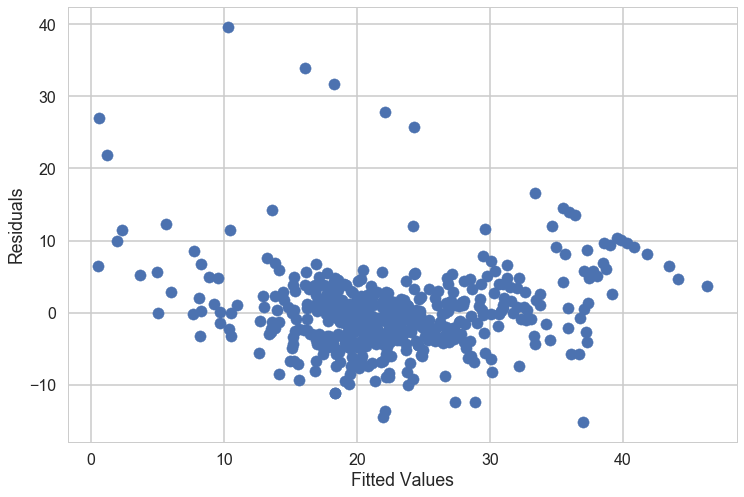

In [71]:
# Scatter plot for 'Fitted' vs 'Residuals' to check for any violations of the model assumption?

m = ols('PRICE ~ RM + CRIM + PTRATIO + INDUS', bos).fit()
fitted_values = m.fittedvalues
residuals = m.resid

figure(figsize=(12,8))
plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

### About Fitted vs Residuals Plot: 
This helps to see if the residuals follow a normal distribution with mean = 0, some standard deviation and a bell-curve shape.

**Graphical Interpretation**

1. Residual plots are a useful graphical tool for identifying non-linearity.
1. A strong pattern in the residuals indicates non-linearity in the data.

Though a correlation between the fitted values and the residuals is evident, the relationship is not strong enough to conclude that the linear model is weak.

**Pros of Fitted vs Residual Advantage**: 
2. It shows the residual value for each fitted X-value.
1. With a more widely distributed plot scheme, it's easier to identify outliers

** Cons of Fitted vs Residual Advantage**:
1. The distadvantage to this is that the residuals are not normalized by the mean or standard deviation. (This disadvantage is addressed by QQ-Plot below)

### Qualtile plot of the residuals

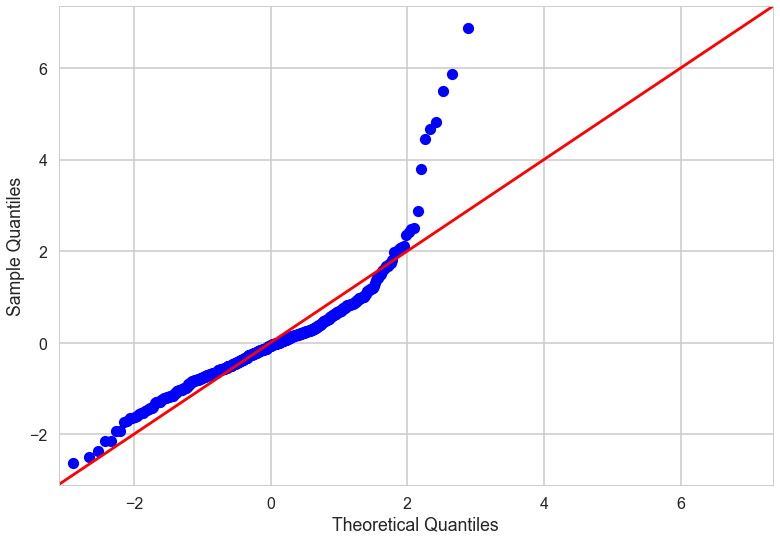

In [72]:
# Quantile plot of the residuals. 
mean = np.mean(residuals)
standard_deviation = np.std(residuals)
z = (residuals - mean) / standard_deviation
figure(figsize=(12,8))
fig1 = sm.qqplot(z, line = '45')

#note: the "line = '45'" is the reference line (x = y). It crosses the origin
#and has a 45 degree slope.

### About QQ Plot:
The quantile plot represents the normality of residuals. (If the residuals line follows the 45-degree reference line (in red)). That denotes that the residuals have a normal distribution.

** Graphical Interpretation**: A normal QQ-plot would have points along the diagonal line. Since the above QQ-plot does not have the same behavior, the relationship appears to be non-linear here. Thus, the plot tells us that the assumption of a normal distribution of errors is violated.

**Pros of QQ Plot**: 
1. The guiding line provides a more concrete picture of error normality. 

** Cons of QQ Plot**:
1. The disadvantage is that the plot is not easily readable. There needs to be an understanding of what a normal distribution is, how it is broken up in quantiles before the graph is interpreted.

**Outliers** : 
The outliers are concentrated in the tail ends of the line. 

1. This could be a result of housing prices not being standardized given combination of variables in the model. (or)
1. They likely represent towns with unusual housing political policy, all located closely to each other geographically.

### Leverage plot and Influence Plot

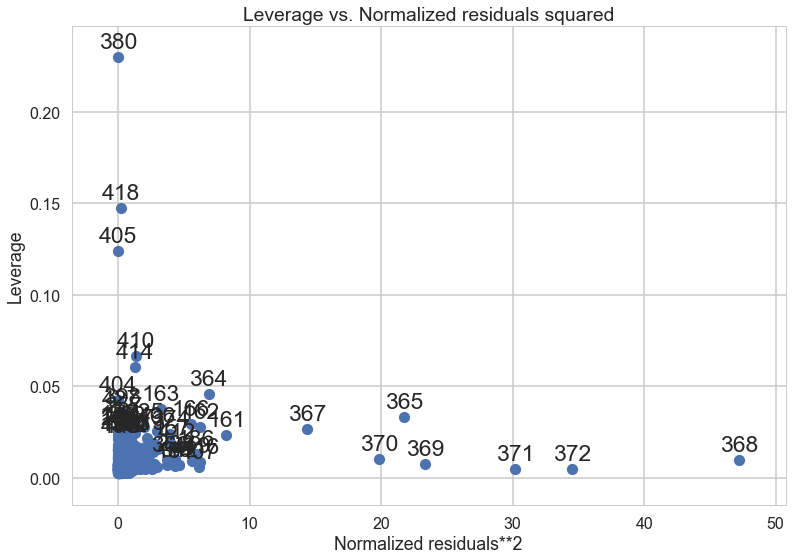

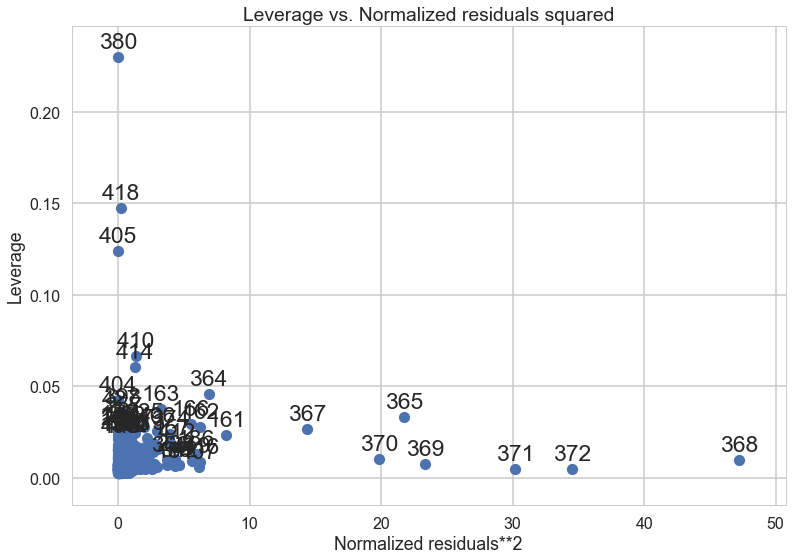

In [73]:
# Leverage Plot
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(m)

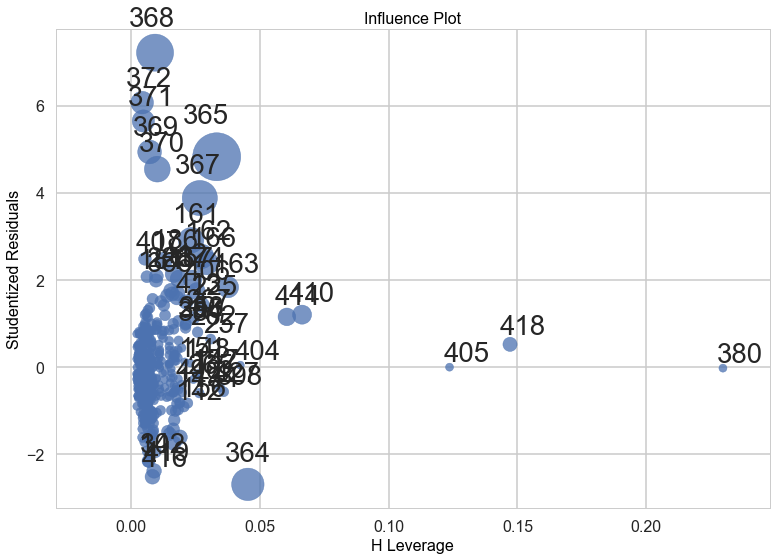

In [74]:
# Influence plot to identify high leverage points in the model.
import statsmodels.graphics.regressionplots as plots

figure(figsize=(12,8))
fig2 = plots.influence_plot(m)

**Graphical Interpretation**:

Since we have included the variables with small coefficient values, that might be the result for the high leverage points. Which means that the variables are not good fits to the regression line/model.

## Part 9 - Perform Linear Regression (without the outliers and high leverage points)

In [75]:
residuals.sort_values(ascending=False).head(10)

368    39.692022
372    33.942798
371    31.726936
369    27.896795
365    26.941628
370    25.720925
367    21.900447
161    16.571437
162    14.453573
407    14.300915
dtype: float64

In [76]:
# New Model
n = ols('PRICE ~ RM', bos).fit()
fitted_values = m.fittedvalues
residuals = m.resid

In [77]:
# Influence Plot
infl1 = n.get_influence()
infl_stats = infl1.summary_frame()
dffits = infl_stats.sort_values('dffits',ascending=False)[['dffits']]
dffits.head(5)

,dffits
365,0.844331
368,0.588350
367,0.566177
372,0.248659
374,0.238912


** Note**:
The threshold for DFFITS is given by $2\sqrt\frac{p}{n}$, where $p$ is the number of model parameters and $n$ is the number of points.

In [79]:
import math

In [80]:
dffits[dffits['dffits'] > (2*math.sqrt(13/len(bos)))]

,dffits
365,0.844331
368,0.588350
367,0.566177


In [81]:
X_new = X.drop([365,367,368])
y = bos[['PRICE']]
y_new = y.drop([365,367,368])

#### Co-efficients of New Model

In [82]:
# Co-efficients of new model
multi_regression(X_new[['PTRATIO','CRIM','RM']], y_new.PRICE)

r-squared value: 0.655874291254
f-statistic: 1.90591482875
p-value: 1.0


0.65587429125397478

#### Co-efficients of Model 1

In [83]:
# Co-efficients of model 1 ('PTRATIO','CRIM','CHAS','RM')
multi_regression(bos[['PTRATIO','CRIM','CHAS','RM']],bos.PRICE)

r-squared value: 0.600364286331
f-statistic: 1.50227886497
p-value: 0.999997381003


0.60036428633127048

#### Co-efficients of Model 2

In [84]:
# Co-efficients of model 2 ('PTRATIO','CRIM','RM')
multi_regression(bos[['PTRATIO','CRIM','RM']],bos.PRICE)

r-squared value: 0.593414155114
f-statistic: 1.45950520063
p-value: 0.99998850611


0.59341415511369788

It is evident that the new model (after excluding the outliers and high influence), has a R-Square value of 0.65 (0.05 more than previous two models)

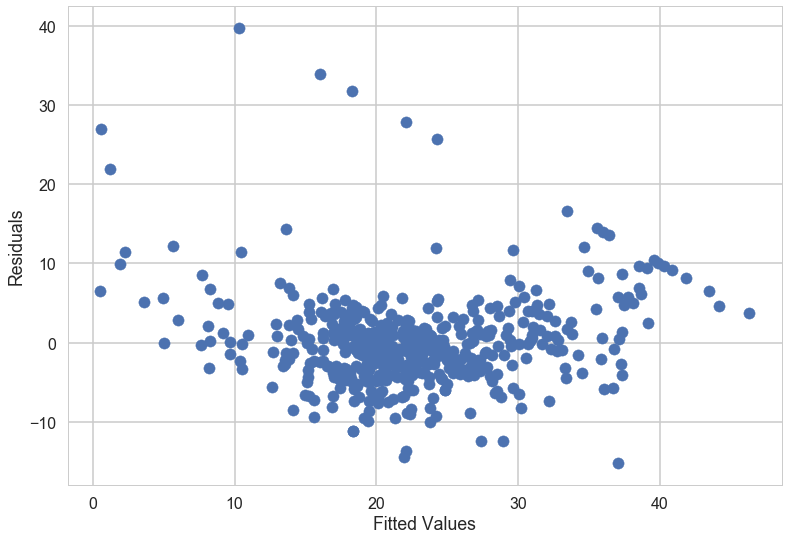

In [85]:
# Fitted Values vs Residuals plot
bos_new = pd.concat([X_new, y_new], axis=1, join_axes=[X_new.index])

n = ols('PRICE ~ RM + CRIM + PTRATIO', bos).fit()
new_fitted_values = m.fittedvalues
new_residuals = m.resid

plt.scatter(new_fitted_values, new_residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

Compared to the previous scatterplot (including outliers and high influence), this model has a weaker relationship between the variables. This means that the regression line is stronger/model is a better fit.

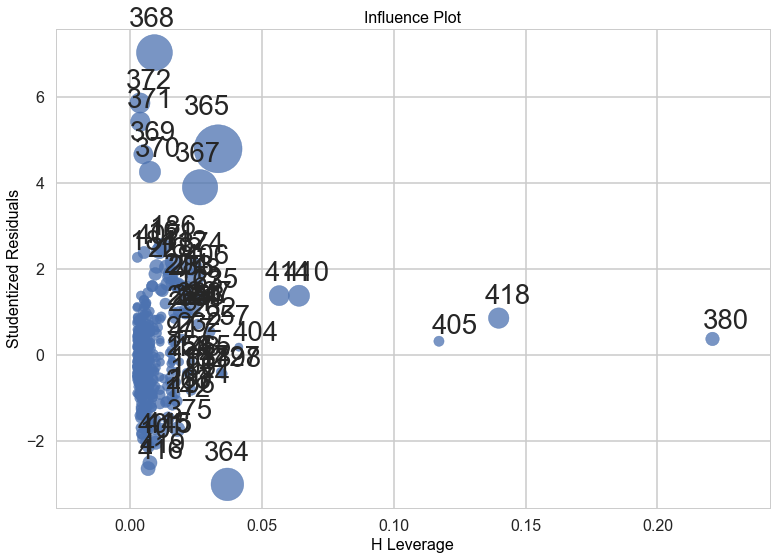

In [87]:
# Influence plot for the new_model
fig3 = plots.influence_plot(n)

** Graphical Interpretation**

It is apparent that after the outliers and major influence points were removed, the leverage plot now shows a tighter horizontal relationship.